# Project Introduction

## Group Name: Roman Hackers

- **Nobuhle Mncube**
- **Olebogeng Itumeleng**   
- **Neo Mhlongo** 
- 
This project analyzes five Exchange-Traded Funds (ETFs) to evaluate their historical performance and future projections:  
- **US500 (VOO)**: Tracks the S&P 500 index, representing the performance of 500 large-cap U.S. companies, offering broad market exposure.  
- **GLD**: Tracks the price of gold bullion, serving as a hedge against inflation and currency fluctuations.  
- **JPXN (JPX-Nikkei 400)**: Follows the Nikkei 400 index, comprising top Japanese companies with strong governance, reflecting Japan’s equity market.  
- **NPNJn**: Represents an ETF tied to Naspers (NPN) in Johannesburg, focusing on South African and global internet/e-commerce sectors.  
- **STX40 (STX40J)**: Tracks the FTSE/JSE Top 40 Index, covering South Africa’s largest companies by market capitalization.  

These ETFs were selected for their diverse geographic and sectoral representation, providing a comprehensive view of global and local market trends from 2015 to 2025, with projections extending to 2035.  

## Project Structure

This project is divided into two main parts:  
1. **Descriptive Analysis**: We explore historical data of the selected ETFs from 2015 to 2025, calculating returns, profits, and visualizing trends to understand their performance.  
2. **Linear Regression**: We use linear regression to project future performance of the ETFs from 2025 to 2035, providing insights into potential investment outcomes.

In [171]:
import logging
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis

In [172]:
gld_data = pd.read_csv("2015-2025/GLD Historical Data.csv", thousands=',')
jpx_data = pd.read_csv("2015-2025/JPX-Nikkei 400 Historical Data.csv", thousands=',')
npn_data = pd.read_csv("2015-2025/NPNJn Historical Data.csv", thousands=',')
stx_data = pd.read_csv("2015-2025/STX40J Historical Data.csv", thousands=',')
voo_data = pd.read_csv("2015-2025/VOO Historical Data.csv", thousands=',')

print("Gold DataFrame:")
print(gld_data)
print("\nFNBT40J DataFrame:")
print(jpx_data)
print("\nSTX40J DataFrame:")
print(stx_data)
print("\nSTXNDQJ DataFrame:")
print(npn_data)
print("\nSTXPROJ DataFrame:")
print(voo_data)


Gold DataFrame:
           Date   Price    Open    High     Low     Vol. Change %
0    2025/05/01  304.63  297.21  315.61  295.32   63.66M    0.28%
1    2025/04/01  303.77  288.54  317.63  272.58  354.30M    5.42%
2    2025/03/01  288.14  265.07  288.39  265.07  181.03M    9.45%
3    2025/02/01  263.27  259.75  272.32  259.52  178.99M    1.82%
4    2025/01/01  258.56  244.22  259.99  242.05  141.39M    6.79%
..          ...     ...     ...     ...     ...      ...      ...
120  2015/05/01  114.10  112.42  117.88  112.28   99.10M    0.56%
121  2015/04/01  113.47  114.56  117.47  112.77  106.64M   -0.17%
122  2015/03/01  113.66  116.50  116.64  109.77  133.48M   -2.15%
123  2015/02/01  116.16  121.84  123.15  114.29  125.69M   -5.91%
124  2015/01/01  123.45  112.49  125.58  112.32  198.03M    8.69%

[125 rows x 7 columns]

FNBT40J DataFrame:
           Date     Price      Open      High       Low   Vol. Change %
0    2025/05/01  24539.11  24201.90  24574.84  24094.93    NaN    1.55%
1   

In [173]:
def convert_volume(vol):
    try:
        if isinstance(vol, str):
            if 'M' in vol:
                return float(vol.replace('M', '')) * 1_000_000
            elif 'K' in vol:
                return float(vol.replace('K', '')) * 1_000
            else:
                return float(vol)
        return float(vol)
    except:
        return np.nan

def convert_change_percent(change):
    try:
        if isinstance(change, str):
            return float(change.replace('%', '')) / 100
        return float(change)
    except:
        return np.nan

for df in [gld_data, jpx_data, npn_data, stx_data, voo_data]:
    df['Vol.'] = df['Vol.'].apply(convert_volume)
    df['Change %'] = df['Change %'].apply(convert_change_percent)

## Linear Regression and growth projection

### Vanguard S&P 500 ETF

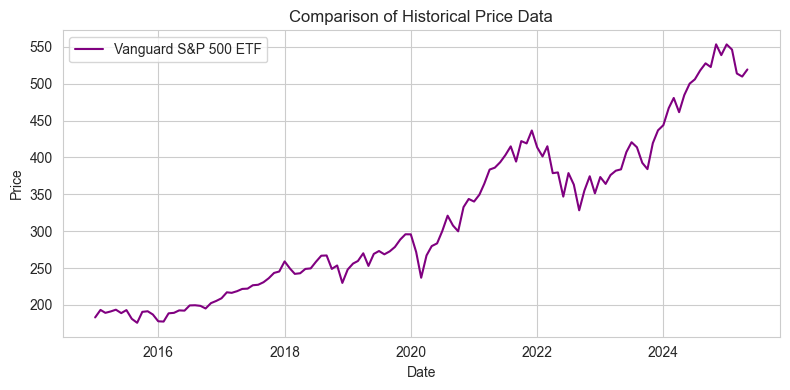

In [174]:
voo_data['Date'] = pd.to_datetime(voo_data['Date'])
filtered_data = voo_data[voo_data['Date'] >= '2015-01-01']
plt.figure(figsize=(8, 4))  # Reduced size
plt.plot(voo_data['Date'], voo_data['Price'], label='Vanguard S&P 500 ETF', color='purple')
plt.title('Comparison of Historical Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Gold

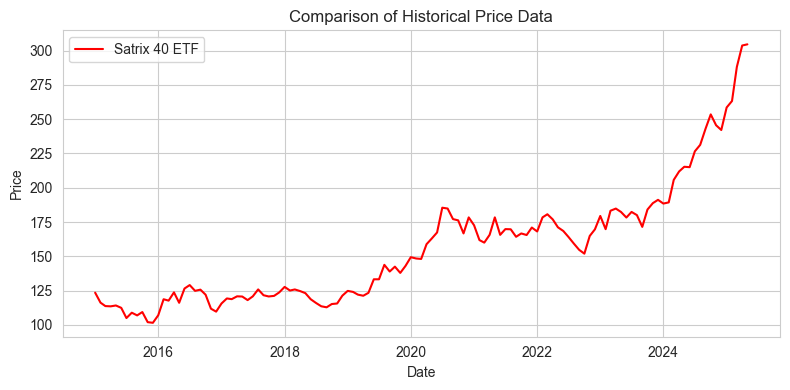

In [175]:
gld_data['Date'] = pd.to_datetime(gld_data['Date'])
filtered_data = gld_data[gld_data['Date'] >= '2015-01-01']
plt.figure(figsize=(8, 4))
plt.plot(gld_data['Date'], gld_data['Price'], label='Satrix 40 ETF', color='red')
plt.title('Comparison of Historical Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### JPX-Nikkei 400

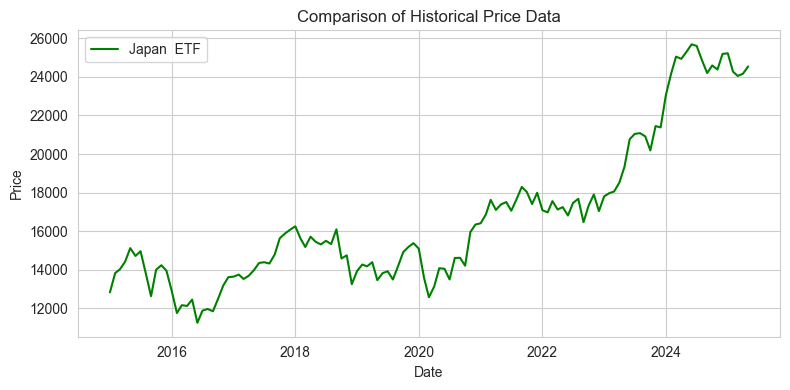

In [176]:
jpx_data['Date'] = pd.to_datetime(jpx_data['Date'])
filtered_data = jpx_data[jpx_data['Date'] >= '2015-01-01']
plt.figure(figsize=(8, 4))
plt.plot(jpx_data['Date'], jpx_data['Price'], label='Japan  ETF', color='green')
plt.title('Comparison of Historical Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Satrix Top 40

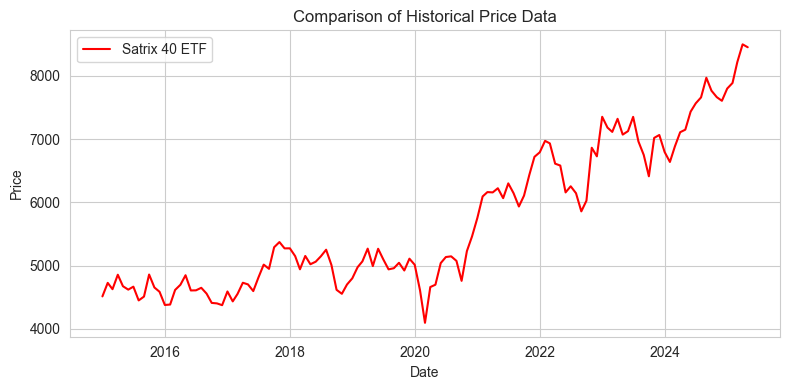

In [177]:
stx_data['Date'] = pd.to_datetime(stx_data['Date'])
filtered_data = stx_data[stx_data['Date'] >= '2015-01-01']
plt.figure(figsize=(8, 4))
plt.plot(stx_data['Date'], stx_data['Price'], label='Satrix 40 ETF', color='red')
plt.title('Comparison of Historical Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Naspers

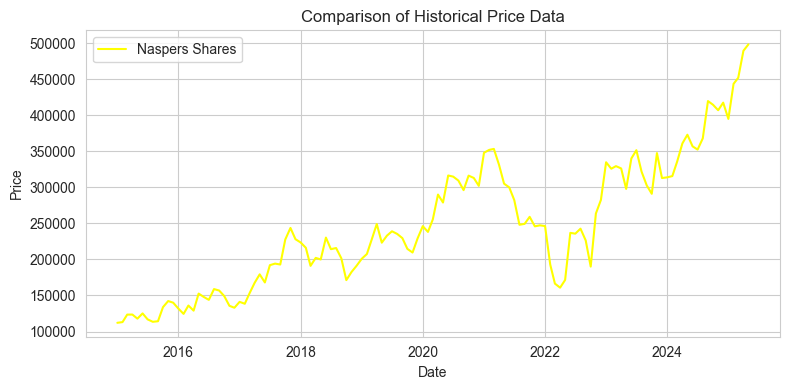

In [178]:
npn_data['Date'] = pd.to_datetime(npn_data['Date'])
filtered_data = npn_data[npn_data['Date'] >= '2015-01-01']
plt.figure(figsize=(8, 4))
plt.plot(npn_data['Date'], npn_data['Price'], label='Naspers Shares', color='yellow')
plt.title('Comparison of Historical Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The prediction of my investment suggests strong long-term returns based on historical performance and future projections. I decided to diversify my assets by investing R20,000 in each option—VOO, GLD, JPXN, NPNJn, and STX40—spreading my total investment of R100,000 across different markets and asset classes to minimize risk and maximize potential gains.

In [179]:
gld_data['Date'] = pd.to_datetime(gld_data['Date'], errors='coerce')
jpx_data['Date'] = pd.to_datetime(jpx_data['Date'], errors='coerce')
npn_data['Date'] = pd.to_datetime(npn_data['Date'], errors='coerce')
stx_data['Date'] = pd.to_datetime(stx_data['Date'], errors='coerce')
voo_data['Date'] = pd.to_datetime(voo_data['Date'], errors='coerce')

exchange_rate = 15
gld_data['Price'] = gld_data['Price'] * exchange_rate
voo_data['Price'] = voo_data['Price'] * exchange_rate

for df in [gld_data, jpx_data, npn_data, stx_data, voo_data]:
    df.dropna(subset=['Date', 'Price'], inplace=True)

initial_investment = 20000
datasets = {
    'US500 (VOO)': voo_data,
    'GLD': gld_data,
    'JPXN (JPX-Nikkei 400)': jpx_data,
    'NPNJn': npn_data,
    'STX40 (STX40J)': stx_data
}

annual_fee_rate = 0.005
cgt_inclusion_rate = 0.40
cgt_rate = 0.18
cgt_exemption = 40000

def find_nearest_year_end(df, target_year, target_date=None):
    target = pd.to_datetime(target_date if target_date else f'{target_year}-12-31')
    df_dates = df['Date'].sort_values()
    nearest_date = df_dates.iloc[(df_dates - target).abs().argmin()]
    return nearest_date

def extract_yearly_prices(df, start_year, end_year):
    prices = {}
    for year in range(start_year, end_year + 1):
        date = find_nearest_year_end(df, year, '2025-05-10' if year == 2025 else None)
        price = df[df['Date'] == date]['Price'].iloc[0]
        prices[year] = price
    return pd.DataFrame(list(prices.items()), columns=['Year', 'Price']).set_index('Year')

yearly_data = {name: extract_yearly_prices(df, 2015, 2025) for name, df in datasets.items()}

def calculate_tax(gain, years_held):
    if years_held <= 3:
        return 0
    taxable_gain = gain * cgt_inclusion_rate
    exemption = min(cgt_exemption * years_held, 400000)
    taxable_gain = max(0, taxable_gain - exemption)
    return taxable_gain * cgt_rate

def calculate_annual_returns(df, start_year, end_year, initial_investment, name):
    df_period = df[(df.index >= start_year) & (df.index <= end_year)].copy()
    if df_period.empty:
        return pd.Series(), pd.Series(), pd.Series()
    
    start_price = df_period.iloc[0]['Price']
    shares = initial_investment / start_price
    returns, values, taxes = [], [], []
    
    for year in range(start_year, end_year + 1):
        if year not in df_period.index:
            prev_year = df_period.index[df_period.index <= year].max()
            next_year = df_period.index[df_period.index >= year].min()
            price = df_period.loc[prev_year, 'Price'] if prev_year == next_year else \
                   df_period.loc[prev_year, 'Price'] + (df_period.loc[next_year, 'Price'] - df_period.loc[prev_year, 'Price']) * \
                   (year - prev_year) / (next_year - prev_year)
        else:
            price = df_period.loc[year, 'Price']
            
        value = shares * price
        years_held = year - start_year + 1
        fees = value * (1 - (1 - annual_fee_rate) ** years_held)
        value_after_fees = value - fees
        gain = value_after_fees - initial_investment
        tax = calculate_tax(gain, years_held)
        value_after_tax = value_after_fees - tax
        return_pct = ((value_after_tax / initial_investment - 1) * 100)
        
        returns.append(return_pct)
        values.append(value_after_tax)
        taxes.append(tax)
        
    return (pd.Series(returns, index=range(start_year, end_year + 1)),
            pd.Series(values, index=range(start_year, end_year + 1)),
            pd.Series(taxes, index=range(start_year, end_year + 1)))

def calculate_cumulative_returns(df, start_year, end_year, initial_investment, name):
    annual_returns, annual_values, annual_taxes = calculate_annual_returns(df, start_year, end_year, initial_investment, name)
    if annual_returns.empty:
        return pd.Series(), pd.Series(), pd.Series()
    
    cumulative_returns = [annual_returns.iloc[0]]
    for i in range(1, len(annual_returns)):
        cumulative_returns.append(((1 + annual_returns.iloc[i]/100) * (1 + cumulative_returns[i-1]/100) - 1) * 100)
    
    return (pd.Series(cumulative_returns, index=annual_returns.index),
            annual_values,
            annual_taxes)

def rand_formatter(x, pos):
    return f'R{int(x):,d}'

custom_palette = {
    'US500 (VOO)': 'blue',
    'GLD': 'gold',
    'JPXN (JPX-Nikkei 400)': 'red',
    'NPNJn': 'green',
    'STX40 (STX40J)': 'purple'
}

year_ranges = {
    '2015-2016': (2015, 2016),
    '2015-2017': (2015, 2017),
    '2015-2020': (2015, 2020),
    '2015-2025': (2015, 2025)
}

returns_table = {name: {} for name in datasets.keys()}
values_table = {name: {} for name in datasets.keys()}
taxes_table = {name: {} for name in datasets.keys()}

sns.set_style("whitegrid")

In [180]:
print("\nInvestment Summary:")
for name in datasets.keys():
    print(f"Invested in {name}: R20,000")
print(f"Total Investment: R100,000")


Investment Summary:
Invested in US500 (VOO): R20,000
Invested in GLD: R20,000
Invested in JPXN (JPX-Nikkei 400): R20,000
Invested in NPNJn: R20,000
Invested in STX40 (STX40J): R20,000
Total Investment: R100,000


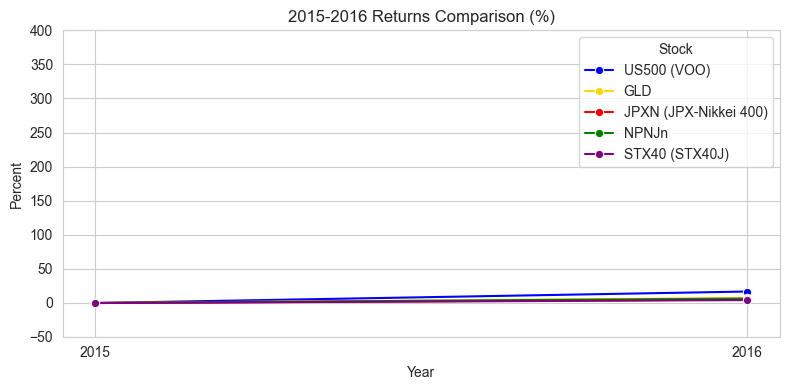

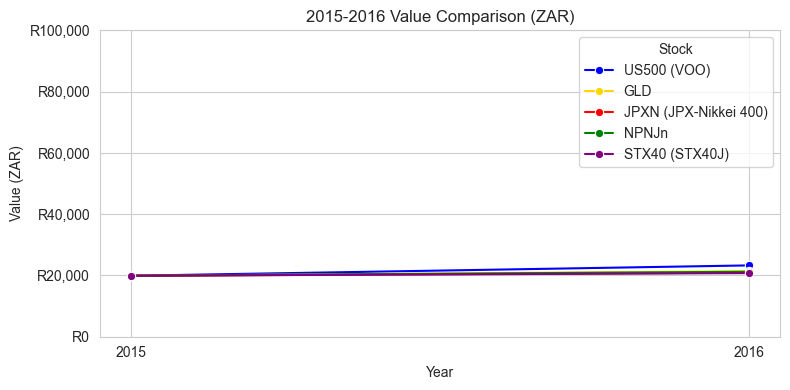

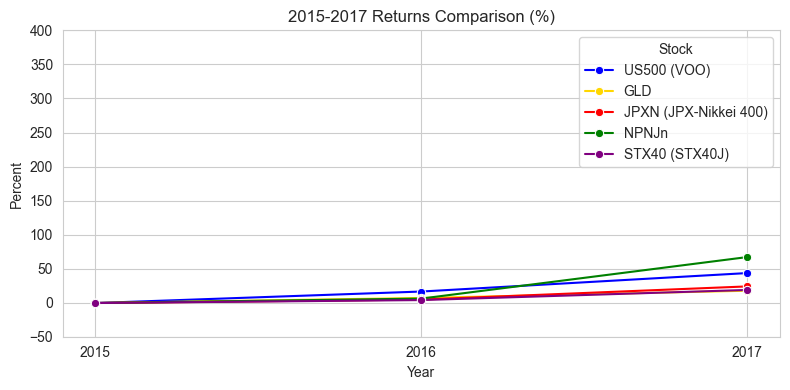

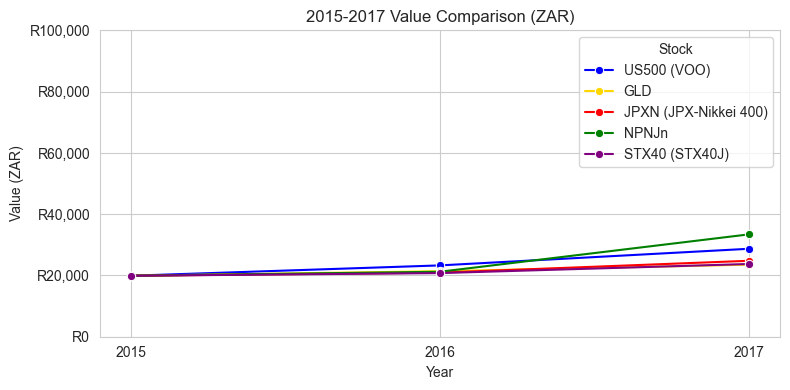

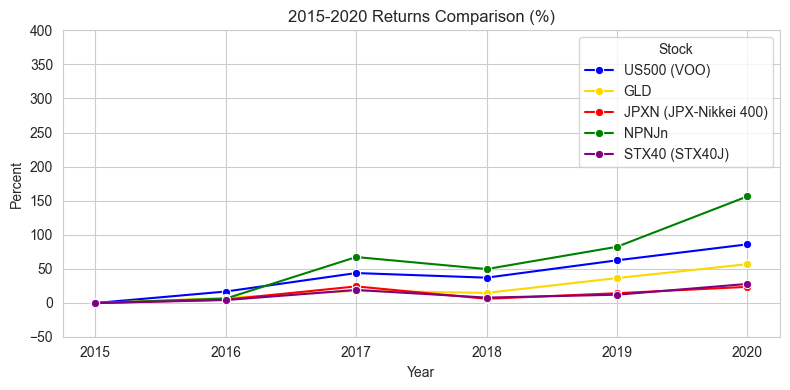

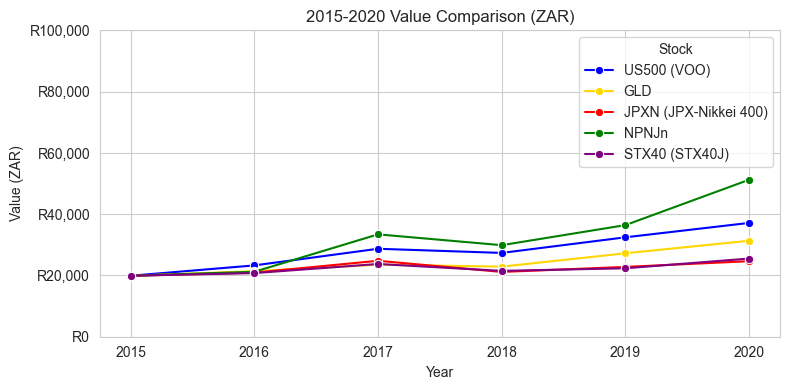

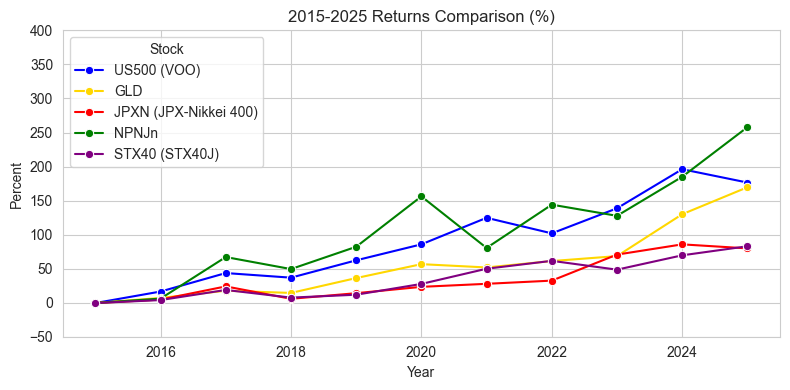

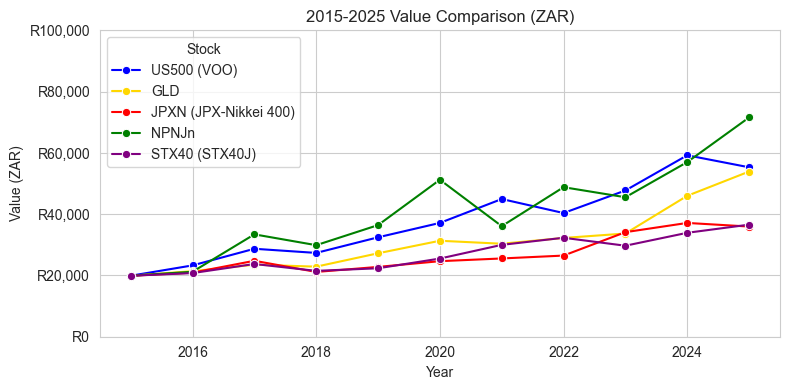

In [181]:
for period, (start_year, end_year) in year_ranges.items():
    plt.figure(figsize=(8, 4))
    for name, df in yearly_data.items():
        returns_series, _, _ = calculate_annual_returns(df, start_year, end_year, initial_investment, name)
        if not returns_series.empty:
            data = pd.DataFrame({'Year': returns_series.index, 'Return (%)': returns_series, 'Stock': name})
            sns.lineplot(data=data, x='Year', y='Return (%)', hue='Stock', marker='o', palette=custom_palette)
            returns_table[name][f'{period} (Returns)'] = returns_series.iloc[-1]
    plt.title(f'{period} Returns Comparison (%)')
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.ylim(-50, 400)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.savefig(f'{period}_Returns_Percentage.png')
    plt.show()
    plt.figure(figsize=(8, 4))
    for name, df in yearly_data.items():
        _, values_series, taxes_series = calculate_annual_returns(df, start_year, end_year, initial_investment, name)
        if not values_series.empty:
            data = pd.DataFrame({'Year': values_series.index, 'Value (ZAR)': values_series, 'Stock': name})
            sns.lineplot(data=data, x='Year', y='Value (ZAR)', hue='Stock', marker='o', palette=custom_palette)
            values_table[name][f'{period} (Value)'] = values_series.iloc[-1]
            taxes_table[name][f'{period} (Tax)'] = taxes_series.iloc[-1]
    plt.title(f'{period} Value Comparison (ZAR)')
    plt.xlabel('Year')
    plt.ylabel('Value (ZAR)')
    plt.ylim(0, 100000)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(rand_formatter))
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.savefig(f'{period}_Earnings.png')
    plt.show()


target_10yr_return = {
    'US500 (VOO)': 314.7,
    'GLD': 169.2,
    'STX40 (STX40J)': 140.4,
    'JPXN (JPX-Nikkei 400)': 150.0,
    'NPNJn': 391.8
}

In [182]:
print("\nInvestment Performance Summary:")
results = []
for name in datasets.keys():
    row = {'Investment': name}
  
    for period in year_ranges.keys():
        value_key = f'{period} (Value)'
        if value_key in values_table[name]:
            row[f'{period} Value'] = f"R{values_table[name][value_key]:,.0f}"
            profit = values_table[name][value_key] - initial_investment
            row[f'{period} Profit'] = f"R{profit:,.0f}"
            row[f'{period} Return'] = f"{profit/initial_investment*100:.1f}%"
    

    proj_value = values_table[name].get('10-Year Projection (Value)', 0)
    row['2035 Projected Value'] = f"R{proj_value:,.0f}"
    row['2035 Projected Profit'] = f"R{(proj_value - initial_investment):,.0f}"
    row['2035 Projected Return'] = f"{((proj_value - initial_investment)/initial_investment*100):.1f}%"
    
    results.append(row)

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


Investment Performance Summary:
           Investment 2015-2016 Value 2015-2016 Profit 2015-2016 Return 2015-2017 Value 2015-2017 Profit 2015-2017 Return 2015-2020 Value 2015-2020 Profit 2015-2020 Return 2015-2025 Value 2015-2025 Profit 2015-2025 Return 2035 Projected Value 2035 Projected Profit 2035 Projected Return
          US500 (VOO)         R23,278           R3,278            16.4%         R28,706           R8,706            43.5%         R37,142          R17,142            85.7%         R55,300          R35,300           176.5%                   R0              R-20,000               -100.0%
                  GLD         R21,393           R1,393             7.0%         R23,515           R3,515            17.6%         R31,322          R11,322            56.6%         R53,911          R33,911           169.6%                   R0              R-20,000               -100.0%
JPXN (JPX-Nikkei 400)         R20,912             R912             4.6%         R24,785           R4,785  

## Descriptive Stats

#### Statistics for Vanguard S&P 500 ETF

In [183]:
print("=== Statistics for Vanguard S&P 500 ETF ===")
print("Count:\n", voo_data.count())
print("Mean:\n", voo_data.mean(numeric_only=True))
print("Median:\n", voo_data.median(numeric_only=True))
print("Standard Deviation:\n", voo_data.std(numeric_only=True))
print("Minimum:\n", voo_data.min(numeric_only=True))
print("Maximum:\n", voo_data.max(numeric_only=True))
print("Skewness:\n", voo_data.skew(numeric_only=True))
print("Kurtosis:\n", voo_data.kurtosis(numeric_only=True))

=== Statistics for Vanguard S&P 500 ETF ===
Count:
 Date        125
Price       125
Open        125
High        125
Low         125
Vol.        125
Change %    125
dtype: int64
Mean:
 Price       4.760800e+03
Open        3.152192e+02
High        3.258355e+02
Low         3.041077e+02
Vol.        7.911424e+07
Change %    9.120800e-03
dtype: float64
Median:
 Price       4.251450e+03
Open        2.800500e+02
High        2.973200e+02
Low         2.727700e+02
Vol.        7.063000e+07
Change %    1.440000e-02
dtype: float64
Standard Deviation:
 Price       1.610396e+03
Open        1.066491e+02
High        1.098300e+02
Low         1.026985e+02
Vol.        4.258624e+07
Change %    4.425042e-02
dtype: float64
Minimum:
 Price       2.635650e+03
Open        1.759700e+02
High        1.803600e+02
Low         1.659600e+02
Vol.        2.576000e+07
Change %   -1.285000e-01
dtype: float64
Maximum:
 Price       8.301750e+03
Open        5.543600e+02
High        5.639200e+02
Low         5.358500e+02
Vol.  

#### Statistics for Gold

In [184]:

print("\n=== Statistics for Gold ===")
print("Count:\n", gld_data.count())
print("Mean:\n", gld_data.mean(numeric_only=True))
print("Median:\n", gld_data.median(numeric_only=True))
print("Standard Deviation:\n", gld_data.std(numeric_only=True))
print("Minimum:\n", gld_data.min(numeric_only=True))
print("Maximum:\n", gld_data.max(numeric_only=True))
print("Skewness:\n", gld_data.skew(numeric_only=True))
print("Kurtosis:\n", gld_data.kurtosis(numeric_only=True))


=== Statistics for Gold ===
Count:
 Date        125
Price       125
Open        125
High        125
Low         125
Vol.        125
Change %    125
dtype: int64
Mean:
 Price       2.341888e+03
Open        1.548046e+02
High        1.606266e+02
Low         1.509177e+02
Vol.        1.760050e+08
Change %    8.754400e-03
dtype: float64
Median:
 Price       2.239950e+03
Open        1.486600e+02
High        1.593700e+02
Low         1.458000e+02
Vol.        1.601100e+08
Change %    2.800000e-03
dtype: float64
Standard Deviation:
 Price       6.570233e+02
Open        4.199749e+01
High        4.502327e+01
Low         4.098650e+01
Vol.        6.364880e+07
Change %    4.120890e-02
dtype: float64
Minimum:
 Price       1.521900e+03
Open        1.023000e+02
High        1.042100e+02
Low         1.002300e+02
Vol.        6.366000e+07
Change %   -8.360000e-02
dtype: float64
Maximum:
 Price       4.569450e+03
Open        2.972100e+02
High        3.176300e+02
Low         2.953200e+02
Vol.        4.576500e

#### Statistics for Japan ETF

In [185]:

print("\n=== Statistics for Japan ETF ===")
print("Count:\n", jpx_data.count())
print("Mean:\n", jpx_data.mean(numeric_only=True))
print("Median:\n", jpx_data.median(numeric_only=True))
print("Standard Deviation:\n", jpx_data.std(numeric_only=True))
print("Minimum:\n", jpx_data.min(numeric_only=True))
print("Maximum:\n", jpx_data.max(numeric_only=True))
print("Skewness:\n", jpx_data.skew(numeric_only=True))
print("Kurtosis:\n", jpx_data.kurtosis(numeric_only=True))



=== Statistics for Japan ETF ===
Count:
 Date        125
Price       125
Open        125
High        125
Low         125
Vol.          5
Change %    125
dtype: int64
Mean:
 Price       16718.712240
Open        16642.035440
High        17200.875760
Low         16003.610560
Vol.           18.000000
Change %        0.006124
dtype: float64
Median:
 Price       15499.780
Open        15411.590
High        15948.610
Low         14914.270
Vol.           20.000
Change %        0.011
dtype: float64
Standard Deviation:
 Price       3838.557704
Open        3810.626268
High        3856.624977
Low         3675.734338
Vol.           4.472136
Change %       0.042106
dtype: float64
Minimum:
 Price       11250.2000
Open        11331.7700
High        11982.2700
Low         10756.4600
Vol.           10.0000
Change %       -0.1013
dtype: float64
Maximum:
 Price       25684.6000
Open        25889.9600
High        27097.2900
Low         24646.4400
Vol.           20.0000
Change %        0.1227
dtype: float64

#### Statistics for Naspers Data 

In [186]:

print("\n=== Statistics for Naspers Data ===")
print("Count:\n", npn_data.count())
print("Mean:\n", npn_data.mean(numeric_only=True))
print("Median:\n", npn_data.median(numeric_only=True))
print("Standard Deviation:\n", npn_data.std(numeric_only=True))
print("Minimum:\n", npn_data.min(numeric_only=True))
print("Maximum:\n", npn_data.max(numeric_only=True))
print("Skewness:\n", npn_data.skew(numeric_only=True))
print("Kurtosis:\n", npn_data.kurtosis(numeric_only=True))


=== Statistics for Naspers Data ===
Count:
 Date        125
Price       125
Open        125
High        125
Low         125
Vol.        125
Change %    125
dtype: int64
Mean:
 Price       2.459002e+05
Open        2.444000e+05
High        2.637175e+05
Low         2.271921e+05
Vol.        2.076840e+07
Change %    1.682080e-02
dtype: float64
Median:
 Price       2.352980e+05
Open        2.315940e+05
High        2.549790e+05
Low         2.223160e+05
Vol.        2.098000e+07
Change %    3.000000e-03
dtype: float64
Standard Deviation:
 Price       9.039715e+04
Open        8.938099e+04
High        9.675922e+04
Low         8.501463e+04
Vol.        9.468125e+06
Change %    9.130113e-02
dtype: float64
Minimum:
 Price       1.120760e+05
Open        9.908800e+04
High        1.129890e+05
Low         9.908800e+04
Vol.        1.640000e+06
Change %   -2.167000e-01
dtype: float64
Maximum:
 Price       4.981630e+05
Open        4.960000e+05
High        5.096740e+05
Low         4.925580e+05
Vol.        7

#### Statistics for Satrix Top 40

In [187]:

print("\n=== Statistics for Satrix Top 40 ===")
print("Count:\n", stx_data.count())
print("Mean:\n", stx_data.mean(numeric_only=True))
print("Median:\n", stx_data.median(numeric_only=True))
print("Standard Deviation:\n", stx_data.std(numeric_only=True))
print("Minimum:\n", stx_data.min(numeric_only=True))
print("Maximum:\n", stx_data.max(numeric_only=True))
print("Skewness:\n", stx_data.skew(numeric_only=True))
print("Kurtosis:\n", stx_data.kurtosis(numeric_only=True))


=== Statistics for Satrix Top 40 ===
Count:
 Date        125
Price       125
Open        125
High        125
Low         125
Vol.        125
Change %    125
dtype: int64
Mean:
 Price       5.708568e+03
Open        5.703408e+03
High        5.913064e+03
Low         5.448368e+03
Vol.        6.832331e+06
Change %    6.079200e-03
dtype: float64
Median:
 Price       5.151000e+03
Open        5.160000e+03
High        5.353000e+03
Low         4.956000e+03
Vol.        5.340000e+06
Change %    7.800000e-03
dtype: float64
Standard Deviation:
 Price       1.143575e+03
Open        1.143602e+03
High        1.171290e+03
Low         1.081566e+03
Vol.        4.580121e+06
Change %    4.165819e-02
dtype: float64
Minimum:
 Price         4093.0000
Open          4145.0000
High          4469.0000
Low           3358.0000
Vol.        731430.0000
Change %        -0.1116
dtype: float64
Maximum:
 Price       8.501000e+03
Open        8.749000e+03
High        8.749000e+03
Low         8.443000e+03
Vol.        2.5800